In [22]:
import numpy as np
from skimage import data, io, filters,color
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:

def createArrFromImage(img):
    rows,cols,colors = img.shape
    imgArray=[]
    for i in range(rows):
        for j in range(cols):
            imgArray.append([img[i,j,0],img[i,j,1],img[i,j,2]])

    return np.array(imgArray,dtype='float64')

def createRBGImgFromArray(arr,rows,cols):
    img=np.zeros((rows,cols,3),dtype='float64')
    for i in range(rows):
        for j in range(cols):
            img[i,j,0] = arr[i*rows+j][0]
            img[i,j,1] = arr[i*rows+j][1]
            img[i,j,2] = arr[i*rows+j][2]

    return img
    

In [24]:
from sklearn import cluster
def quantize(img,k):
    rows,cols,colors = img.shape
    arr = img.reshape(rows*cols,colors)
    clf = cluster.KMeans(n_clusters=k)
    res = clf.fit_predict(arr)
    centroids = clf.cluster_centers_
    newArr = np.array([centroids[i] for i in res])
    return newArr.reshape(rows,cols,colors)

In [25]:
def labQuantizeAndCombine(img,k):
    lab = color.rgb2lab(img)
    rows,cols,colors = lab.shape
    arr = lab[:,:,0].reshape(rows*cols)
    clf = cluster.KMeans(n_clusters=k)
    res = clf.fit_predict(arr.reshape(-1,1))
    centroids = clf.cluster_centers_
    newArr = np.array([centroids[i] for i in res])
    res = newArr.reshape(rows,cols)
    lab[:,:,0] = res
    return (color.lab2rgb(lab))
    

In [26]:
def calculateSSD(im1, im2):
    r1,c1,k1= im1.shape
    r2,c2,k2 = im2.shape
    if(k1!=k2 or r1!=r2 or c1!=c2 and k1!=3):
        return -1
    
    r = r1
    c = c1
    
    arr1 = im1.reshape(r*c,3)
    arr2 = im2.reshape(r*c,3)
    return np.sum([ np.square((arr1[i,0]-arr2[i,0]))+np.square((arr1[i,1]-arr2[i,1]))+np.square((arr1[i,2]-arr2[i,2])) for i in  range(r*c)])

In [27]:
#Q 2.4 Histograms
def plotHists(img,k):
    lab = color.rgb2lab(img)
    r,c,cl = lab.shape
    arr = lab[:,:,0].reshape(r*c)

    clf = cluster.KMeans(n_clusters=k)
    res = clf.fit_predict(arr.reshape(-1,1))
    centroids = clf.cluster_centers_
    centroids = centroids[:,0]
    centroids = np.sort(centroids)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    hist1 = ax1.hist(arr,bins=k,normed=True)
    ax1.set_title('Equally spaced, k='+str(k))
    
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_title('Quantized, k='+str(k))
    hist2 = ax2.hist(arr,bins=centroids,normed=True)






In [ ]:
img_quantized = quantize(img,10)

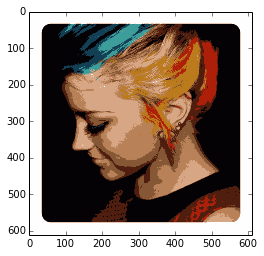

In [42]:
plt.imshow(img_quantized)

In [45]:
img_labQuantized = labQuantizeAndCombine(img,15)

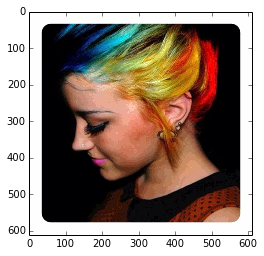

In [46]:
plt.imshow(img_labQuantized)

In [28]:
def compileResults(img,k):
    img_quantized = quantize(img,k)
    img_lQuantized = labQuantizeAndCombine(img,k)
    ssd_rgbQuantized = calculateSSD(img,img_quantized)
    ssd_lQuantized = calculateSSD(img,img_lQuantized)
    print 'ssd_rgbQuantized::',ssd_rgbQuantized
    print 'ssd_lQuantized::',ssd_lQuantized
    plotHists(img,k)

    

Results for Image 1: Colorful.jpg

ssd_rgbQuantized:: 8511.86506026
ssd_lQuantized:: 2301.54443458


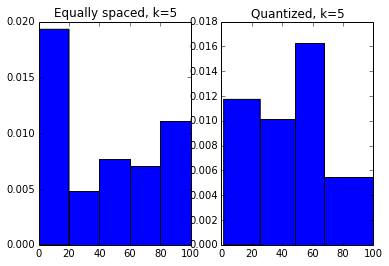

In [29]:
img = (io.imread('Images/Q2/colorful1.jpg',dtype='float64')/255.0)


compileResults(img,5)

ssd_rgbQuantized:: 3946.90383943
ssd_lQuantized:: 529.136391046


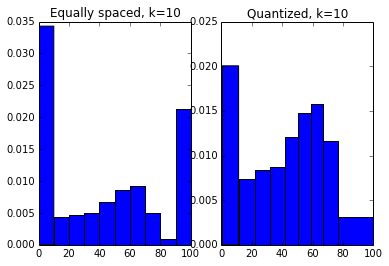

In [30]:
compileResults(img,10)

ssd_rgbQuantized:: 2651.98958983
ssd_lQuantized:: 243.440839976


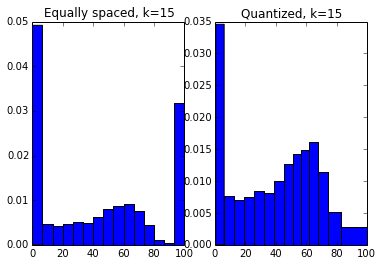

In [31]:
compileResults(img,15)

Results for Image 2: Colorful2.jpg

In [32]:
img2 = (io.imread('Images/Q2/colorful2.jpg',dtype='float64')/255.0)

ssd_rgbQuantized:: 47224.6107205
ssd_lQuantized:: 9027.07285375


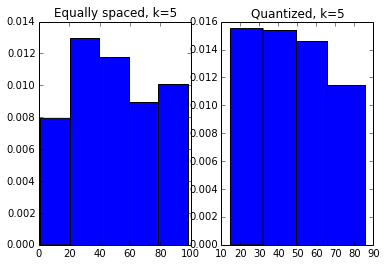

In [33]:
compileResults(img2,5)

ssd_rgbQuantized:: 23757.3020215
ssd_lQuantized:: 2556.04949988


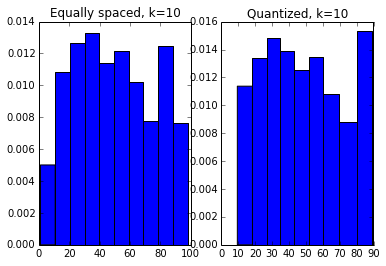

In [34]:
compileResults(img2,10)

ssd_rgbQuantized:: 16117.2528083
ssd_lQuantized:: 1208.64913979


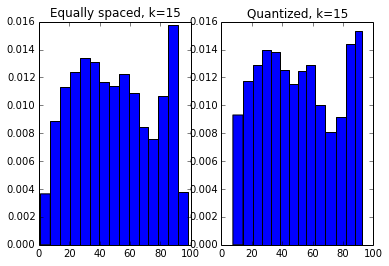

In [35]:
compileResults(img2,15)

Results for Image 3: Colorful3.jpg

In [36]:
img3 = (io.imread('Images/Q2/colorful3.jpg',dtype='float64')/255.0)

ssd_rgbQuantized:: 7635.1964865
ssd_lQuantized:: 1408.05416337


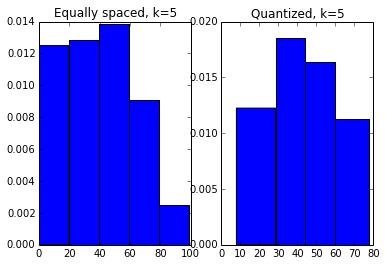

In [37]:
compileResults(img3,5)

ssd_rgbQuantized:: 3873.50547631
ssd_lQuantized:: 395.465634005


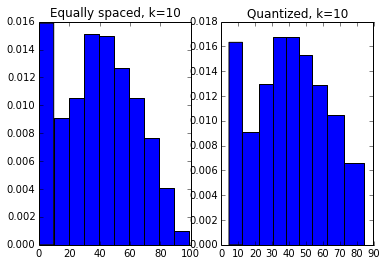

In [38]:
compileResults(img3,10)

ssd_rgbQuantized:: 2680.71814755
ssd_lQuantized:: 187.365145893


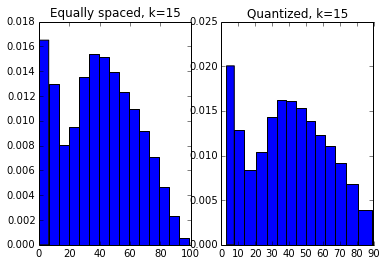

In [39]:
compileResults(img3,15)